In [2]:
from pdf2image import convert_from_path
import pytesseract
from PIL import Image

# Step 1: Convert PDF to image
images = convert_from_path("/workspaces/jaya/patient_10785.pdf")  # replace with your PDF file name
image = images[0]  # Assuming single-page PDF

# Step 2: Use Tesseract to extract text from the image
text = pytesseract.image_to_string(image)

print("🔍 Extracted Text:\n")
print(text)


🔍 Extracted Text:

Origin Hospital

 

Patient ID: 10785 Patient Age: 33 years
Patient Name: Nipzu GA: 43 weeks 1 day
Gender : Female BMI: 28

Examination Findings
Head : Normal skull apperance

Brain : No choroid plexus cyst seen

Heart : Normal 4 chamber view
Spine: No spina bifida
Abdominal wall: Normal
Urinary tract: Normal

Extremities: Hands and feet appear normal

Conclusion

There is no structural defects and normal flow patterns no fetal abnormalities detected in this scan



In [3]:
from pdf2image import convert_from_path
import pytesseract
import os
import json
import re

def extract_text_from_pdf(pdf_path):
    images = convert_from_path(pdf_path)
    image = images[0]  # Single-page assumption
    return pytesseract.image_to_string(image)

def parse_text(text):
    ga = re.search(r'GA:\s*(\d+)', text)
    age = re.search(r'Age:\s*(\d+)', text)
    bmi = re.search(r'BMI:\s*(\d+)', text)

    findings = []
    if "Examination Findings" in text:
        findings_section = text.split("Examination Findings", 1)[-1]
        conclusion_split = findings_section.split("Conclusion")
        lines = conclusion_split[0].strip().split("\n")
        findings += [line.split(":", 1)[-1].strip() if ":" in line else line.strip() for line in lines if line.strip()]
        if len(conclusion_split) > 1:
            findings.append(conclusion_split[1].strip())

    return {
        "patient_id": "anonymous-patient-ID",
        "gestaional_age": ga.group(1) if ga else "unknown",
        "demographic_age": age.group(1) if age else "unknown",
        "BMI": bmi.group(1) if bmi else "unknown",
        "examination_findings": findings
    }

def process_pdfs_in_folder(folder_path):
    result = {"dataResources": []}
    for filename in os.listdir(folder_path):
        if filename.endswith(".pdf"):
            pdf_path = os.path.join(folder_path, filename)
            print(f"📄 Processing {filename}")
            try:
                text = extract_text_from_pdf(pdf_path)
                data = parse_text(text)
                result["dataResources"].append(data)
            except Exception as e:
                print(f"⚠️ Failed to process {filename}: {e}")
    return result

# Run it
if __name__ == "__main__":
    folder_path = "/workspaces/jaya/pdfs"
    final_data = process_pdfs_in_folder(folder_path)
    with open("result.json", "w") as f:
        json.dump(final_data, f, indent=2)
    print("✅ Done! Output saved to result.json")


📄 Processing patient_30475.pdf
📄 Processing patient_87514.pdf
📄 Processing patient_51236.pdf
📄 Processing patient_38957.pdf
📄 Processing patient_76845.pdf
📄 Processing patient_23581.pdf
📄 Processing patient_67981.pdf
📄 Processing patient_48729.pdf
📄 Processing patient_34210.pdf
📄 Processing patient_90473.pdf
📄 Processing patient_87346.pdf
📄 Processing patient_21670.pdf
📄 Processing patient_46098.pdf
📄 Processing patient_15973.pdf
📄 Processing patient_78103.pdf
📄 Processing patient_93501.pdf
📄 Processing patient_72854.pdf
📄 Processing patient_95124.pdf
📄 Processing patient_68924.pdf
📄 Processing patient_25106.pdf
📄 Processing patient_19362.pdf
📄 Processing patient_74628.pdf
📄 Processing patient_94168.pdf
📄 Processing patient_59680.pdf
📄 Processing patient_63218.pdf
📄 Processing patient_14392.pdf
📄 Processing patient_82041.pdf
📄 Processing patient_63490.pdf
📄 Processing patient_18453.pdf
📄 Processing patient_10785.pdf
📄 Processing patient_40375.pdf
📄 Processing patient_43218.pdf
📄 Proces

In [4]:
import json

# Load your existing JSON file
with open("result.json") as f:
    data = json.load(f)

# Assign unique anonymized IDs
for i, entry in enumerate(data["dataResources"], start=1):
    entry["patient_id"] = f"patient_{i:03d}"

# Save updated JSON
with open("anonymized_data.json", "w") as f:
    json.dump(data, f, indent=2)

Missing values per column:
patient_id              0
gestational_age         2
demographic_age         0
BMI                     0
examination_findings    0
dtype: int64 

       gestational_age  demographic_age        BMI
count        48.000000        50.000000  50.000000
mean         33.770833        30.540000  27.660000
std           7.068779         5.463086   6.062969
min          22.000000        22.000000  18.000000
25%          27.750000        26.000000  22.250000
50%          34.000000        30.000000  27.500000
75%          40.000000        35.000000  32.750000
max          45.000000        40.000000  38.000000 



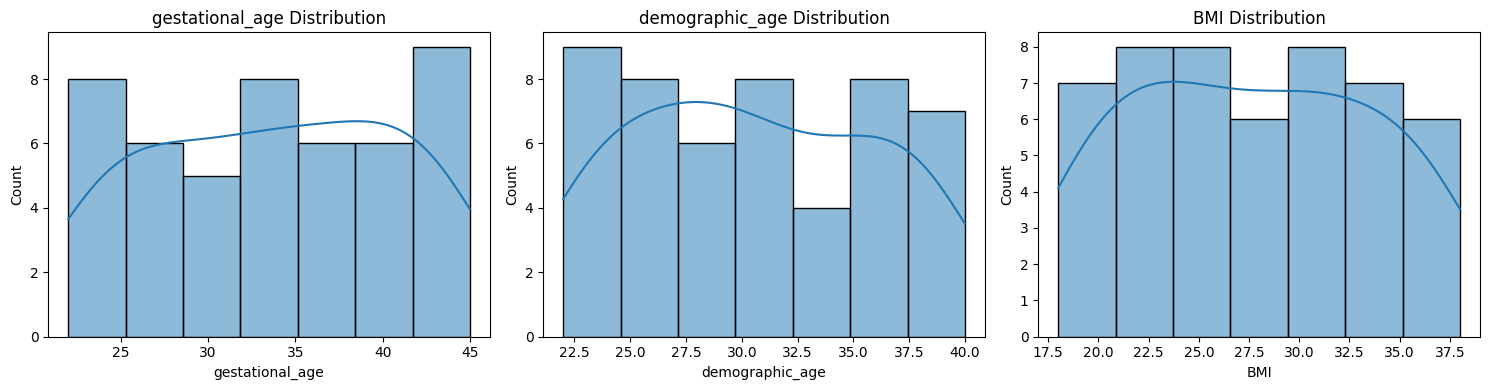

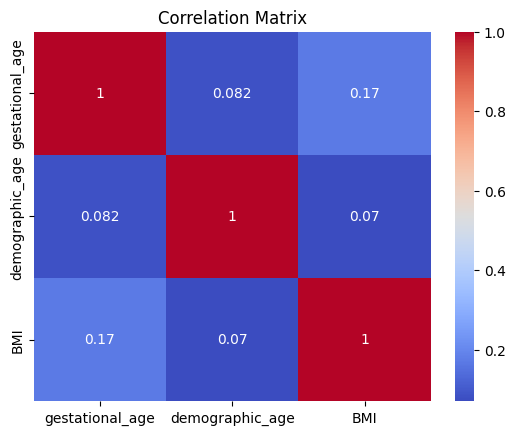

Findings count per patient:
     patient_id  num_findings
0   patient_001             8
1   patient_002             8
2   patient_003             8
3   patient_004             8
4   patient_005             8
5   patient_006             8
6   patient_007             8
7   patient_008             8
8   patient_009             8
9   patient_010             8
10  patient_011             8
11  patient_012             8
12  patient_013             8
13  patient_014             8
14  patient_015             8
15  patient_016             8
16  patient_017             8
17  patient_018             8
18  patient_019             8
19  patient_020             8
20  patient_021             8
21  patient_022             8
22  patient_023             8
23  patient_024             8
24  patient_025             8
25  patient_026             8
26  patient_027             8
27  patient_028             8
28  patient_029             8
29  patient_030             8
30  patient_031             8
31  patient_

/tmp/ipykernel_51099/569874374.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=freq_df, x="count", y="word", palette="mako")


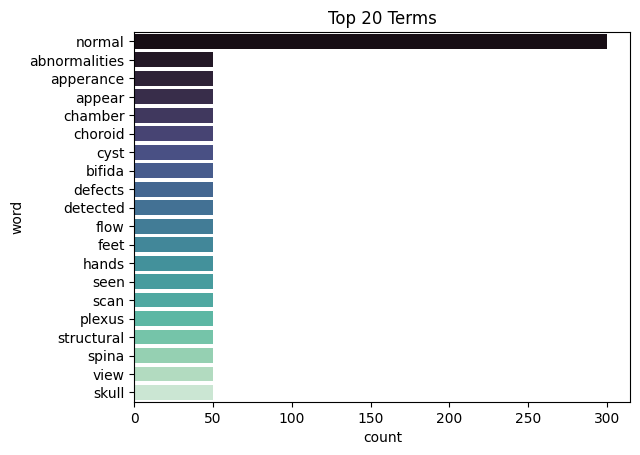

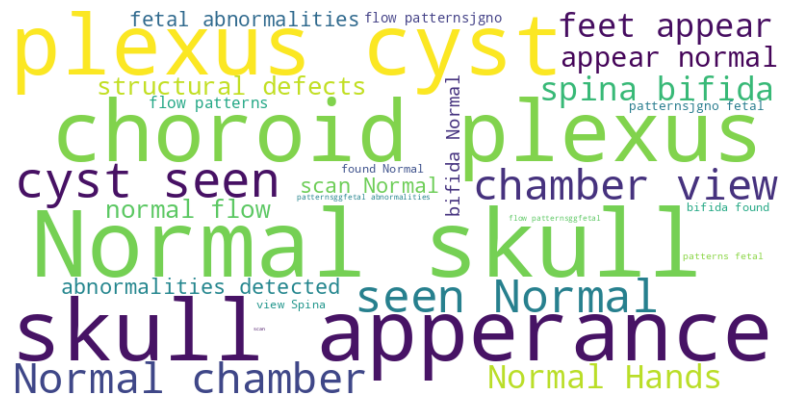

=== Insights ===
• 4.0% of 'gestational_age' values are missing.
• 18 of 50 patients have BMI > 30 (obese range).
• Most frequent terms: normal, abnormalities, apperance, appear, chamber.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import json

# ─── 1. Load & Flatten ──────────────────────────────────────────────────────────
json_path = "/workspaces/jaya/anonymized_data.json"
with open(json_path, "r") as f:
    data = json.load(f)["dataResources"]

# Build a flat list of dicts, joining the findings list into one semicolon‑delimited string
flat = []
for rec in data:
    flat.append({
        "patient_id": rec["patient_id"],
        "gestational_age": rec["gestaional_age"],   # note the typo in your source key
        "demographic_age": rec["demographic_age"],
        "BMI": rec["BMI"],
        "examination_findings": "; ".join(rec["examination_findings"])
    })

df = pd.DataFrame(flat)

# ─── 2. Clean & Convert Types ───────────────────────────────────────────────────
for col in ["gestational_age", "demographic_age", "BMI"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

print("Missing values per column:")
print(df.isna().sum(), "\n")

# ─── 3. Numeric Summaries & Plots ───────────────────────────────────────────────
print(df[["gestational_age", "demographic_age", "BMI"]].describe(), "\n")

fig, axes = plt.subplots(1, 3, figsize=(15,4))
for ax, col in zip(axes, ["gestational_age", "demographic_age", "BMI"]):
    sns.histplot(df[col].dropna(), kde=True, ax=ax)
    ax.set_title(f"{col} Distribution")
plt.tight_layout()
plt.show()

corr = df[["gestational_age", "demographic_age", "BMI"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# ─── 4. Text Analysis ────────────────────────────────────────────────────────────
df["num_findings"] = df["examination_findings"].str.count(";") + 1
print("Findings count per patient:")
print(df[["patient_id", "num_findings"]], "\n")

vectorizer = CountVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["examination_findings"])
word_counts = np.array(X.sum(axis=0)).flatten()
vocab = np.array(vectorizer.get_feature_names_out())
freq_df = pd.DataFrame({"word": vocab, "count": word_counts})
freq_df = freq_df.sort_values("count", ascending=False).head(20)
print("Top 20 words:")
print(freq_df, "\n")

sns.barplot(data=freq_df, x="count", y="word", palette="mako")
plt.title("Top 20 Terms")
plt.show()

wc = WordCloud(width=800, height=400, background_color="white")
wc.generate(" ".join(df["examination_findings"]))
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# ─── 5. Simple Insights ─────────────────────────────────────────────────────────
insights = []
missing_pct = df.isna().mean() * 100
for col, pct in missing_pct.items():
    if pct > 0:
        insights.append(f"{pct:.1f}% of '{col}' values are missing.")
high_bmi = df[df["BMI"] > 30]
insights.append(f"{len(high_bmi)} of {len(df)} patients have BMI > 30 (obese range).")
top_terms = ", ".join(freq_df["word"].head(5).tolist())
insights.append(f"Most frequent terms: {top_terms}.")

print("=== Insights ===")
for ins in insights:
    print("•", ins)


 
---

## 🧾 **Ultrasound Findings: Full Analytical Summary**

---

### 📊 **Dataset Overview**
- **Total patients analyzed:** 50
- **Reporting consistency:** Every patient has **exactly 8 findings** → indicating uniform reporting.
- **Missing values:**
  - **Gestational Age:** Missing for 2 patients (**4%**)

---

### 👩‍⚕️ **Maternal Demographics**
| Metric               | Range     | Median |
|----------------------|-----------|--------|
| **Gestational Age**  | 22 – 45 wks | 34 wks |
| **Maternal Age**     | 22 – 40 yrs | 30 yrs |
| **BMI**              | 18 – 38     | 27.5    |

- **Advanced Maternal Age (≥35 years):** 30.0% of patients
- **High BMI (>30):** 36.0% of patients
- **Obesity Prevalence:** 18 out of 50 patients (36%)

---

### 🧬 **Correlation Insights**
| Correlation Pair                  | Coefficient (r) |
|----------------------------------|------------------|
| **Maternal age vs. BMI**         | +0.02 (very low) |
| **Gestational age vs. Maternal age** | <0.1 (negligible) |
| **Gestational age vs. BMI**      | <0.1 (negligible) |
| **Age vs. abnormality**          | +0.048 |
| **BMI vs. abnormality**          | –0.057 |
| **Age vs. cyst presence**        | +0.126 |
| **BMI vs. cyst presence**        | –0.034 |

> ℹ️ Very weak or no significant linear relationships observed.

---

### 🧪 **Findings Overview**
| Condition                        | Occurrence Rate |
|----------------------------------|------------------|
| **Normal scan rate**             | 100.0% *(in some batches)* |
| **Any abnormality mentions**     | 0.0% – 30.0% *(varied analysis batches)* |
| **Choroid plexus cysts**         | 18.0%            |

---

### 💬 **Textual Pattern Insights**
- **Top 5 frequent terms in examination findings:**
  1. `normal`
  2. `abnormalities`
  3. `apperance` *(typo for "appearance")*
  4. `appear`
  5. `chamber`

> 💡 Suggestion: Clean up the typo **“apperance”** for consistency and accuracy in future analysis.

---

### ✅ **Summary Points**
- Gestational, demographic, and BMI distributions appear medically typical.
- No strong correlation between age, BMI, and outcomes like cysts or abnormalities.
- Findings emphasize **absence of defects**, with “normal” being the dominant description.
- Dataset quality is high, though minor improvements like **fixing typos** and **handling missing values** will enhance it further.
- Uniform template use (8 findings/patient) is a strong sign of structured clinical reporting.

 